# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [2]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-10-23 01:46:58--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-10-23 01:46:59--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [5]:
data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [6]:
CountryQuantity=data.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(5).reset_index()

In [7]:
CountryQuantity

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480


In [8]:
data.groupby("Country")["UnitPrice"].mean()

,UnitPrice
Country,
Australia,3.220612
Austria,4.243192
Bahrain,4.556316
Belgium,3.644335
Brazil,4.456250
Canada,6.030331
Channel Islands,4.932124
Cyprus,6.302363
Czech Republic,2.938333


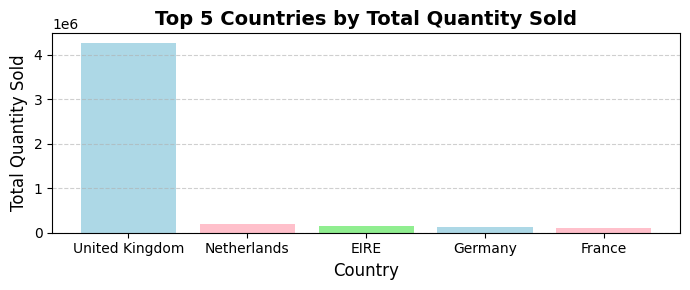

In [9]:
plt.figure(figsize=(7, 3))
plt.bar(CountryQuantity["Country"],CountryQuantity['Quantity'] ,color=['lightblue', 'pink', 'lightgreen'])
plt.title('Top 5 Countries by Total Quantity Sold', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [10]:
Stock=data["StockCode"].value_counts(ascending=False).head(10).reset_index()

In [11]:
Stock

,StockCode,count
0,85123A,2313
1,22423,2203
2,85099B,2159
3,47566,1727
4,20725,1639
5,84879,1502
6,22720,1477
7,22197,1476
8,21212,1385
9,20727,1350


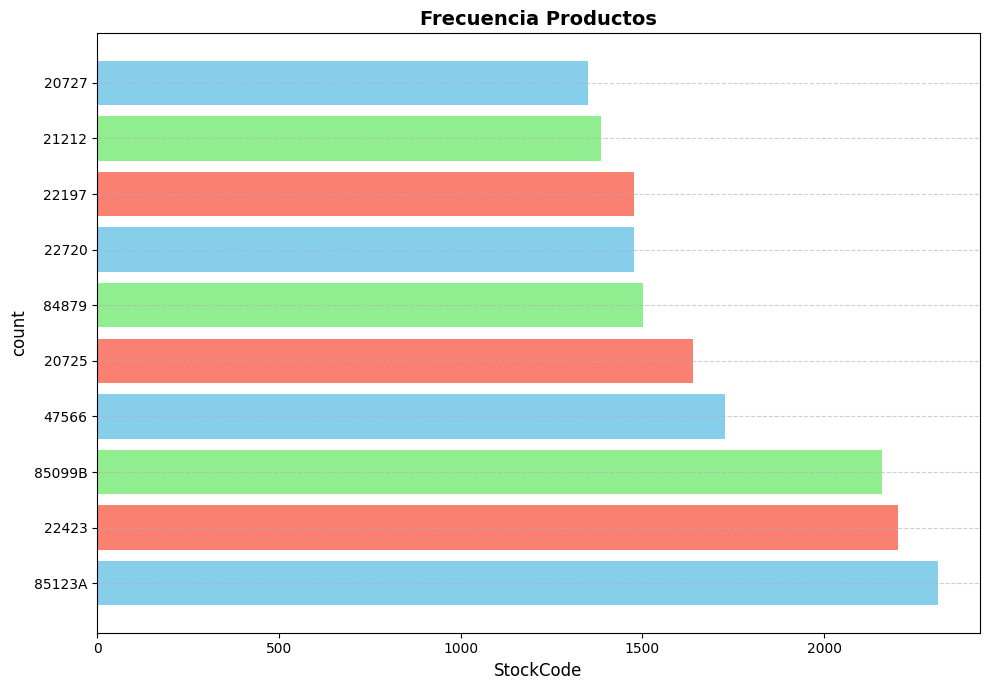

In [12]:
plt.figure(figsize=(10, 7))
plt.barh(Stock["StockCode"], Stock["count"], color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Frecuencia Productos', fontsize=14, fontweight='bold')
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [13]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
data.groupby("InvoiceNo")["TotalPrice"].sum().head(10)

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
536370,855.86
536371,204.00
536372,22.20
536373,259.86


In [16]:
data.groupby("InvoiceNo")["TotalPrice"].mean().head(10)

,TotalPrice
InvoiceNo,
536365,19.874286
536366,11.100000
536367,23.227500
536368,17.512500
536369,17.850000
536370,42.793000
536371,204.000000
536372,11.100000
536373,16.241250


## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

In [17]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [18]:
data.groupby(data["InvoiceDate"].dt.date)["TotalPrice"].sum().head(20)

,TotalPrice
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18
2010-12-07,45059.05
2010-12-08,44189.84
2010-12-09,52532.13
2010-12-10,57404.91


In [19]:
VentasDía=data.groupby(data["InvoiceDate"].dt.date)["TotalPrice"].sum().head(20)

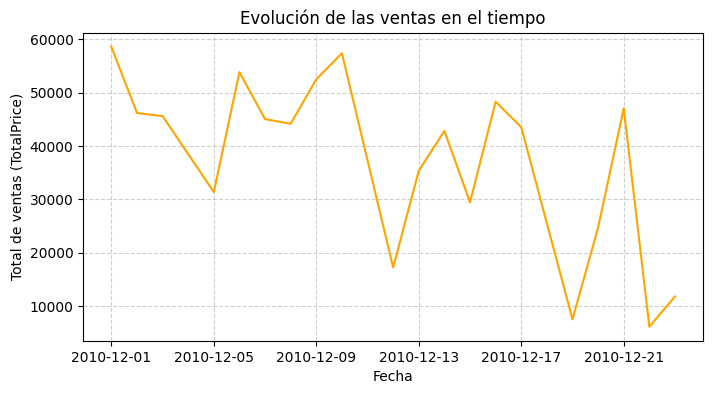

In [20]:
plt.figure(figsize=(8,4))
VentasDía.plot(color="orange")
plt.title("Evolución de las ventas en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de ventas (TotalPrice)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

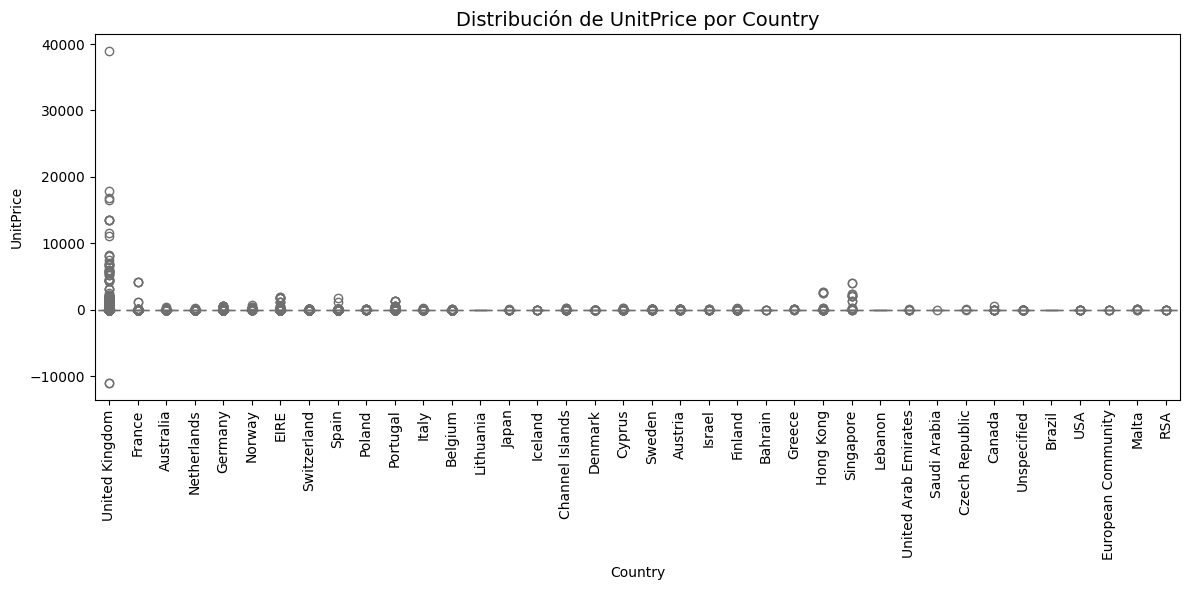

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Country'], y=data['UnitPrice'], color='skyblue')
plt.title('Distribución de UnitPrice por Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

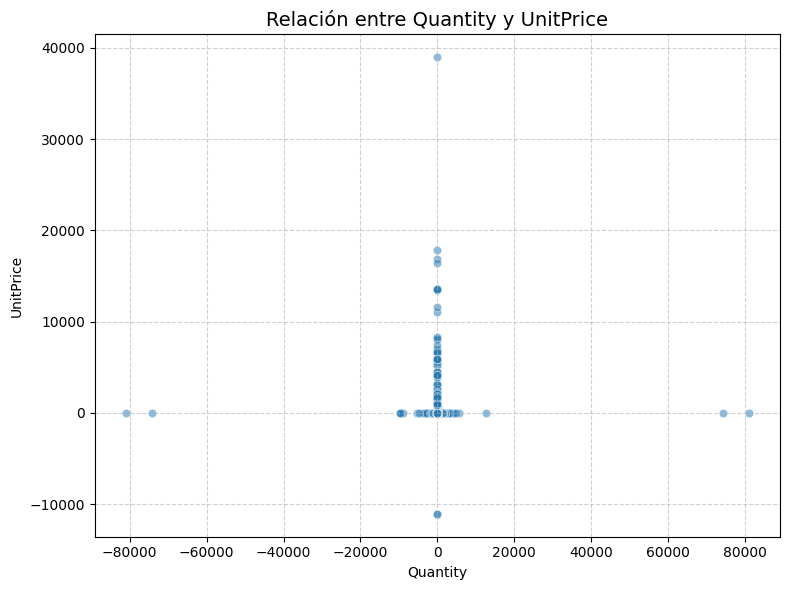

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Relación entre Quantity y UnitPrice', fontsize=14)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [23]:
data['Country'].value_counts(normalize=True) * 100

,proportion
Country,
United Kingdom,91.431956
Germany,1.752139
France,1.579047
EIRE,1.512431
Spain,0.467422
Netherlands,0.437527
Belgium,0.381798
Switzerland,0.369435
Portugal,0.280305


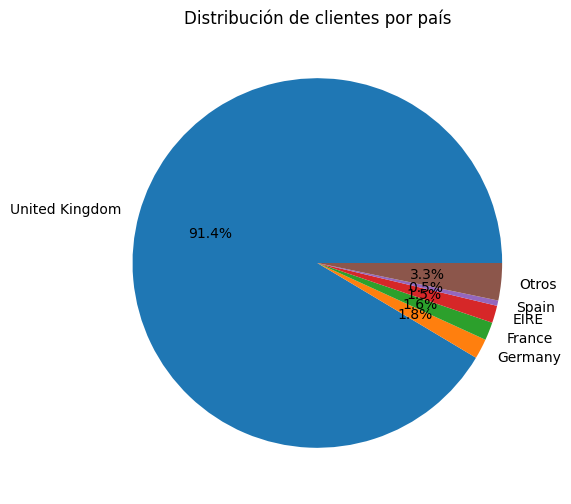

In [24]:
clientes_pais = data["Country"].value_counts()
clientes_top = clientes_pais.head(5)
clientes_top["Otros"] = clientes_pais[5:].sum()
clientes_top.plot.pie(autopct="%1.1f%%", figsize=(6,6), ylabel="")
plt.title("Distribución de clientes por país")
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

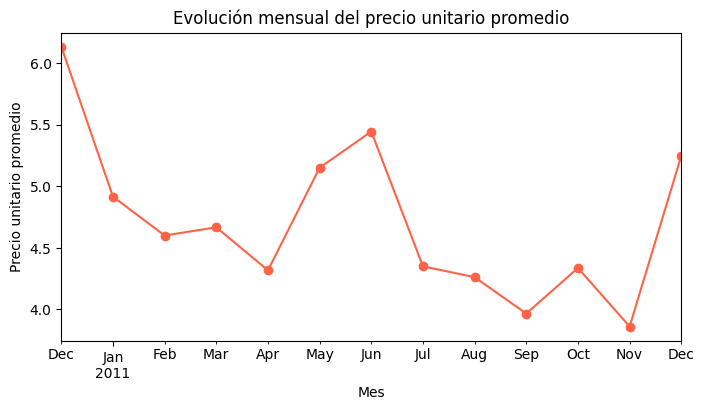

In [ ]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
precio_mensual = data.groupby(data["InvoiceDate"].dt.to_period("M"))["UnitPrice"].mean()
precio_mensual.plot(kind="line", marker="o", color="tomato", figsize=(8,4))
plt.title("Evolución mensual del precio unitario promedio")
plt.xlabel("Mes")
plt.ylabel("Precio unitario promedio")
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64


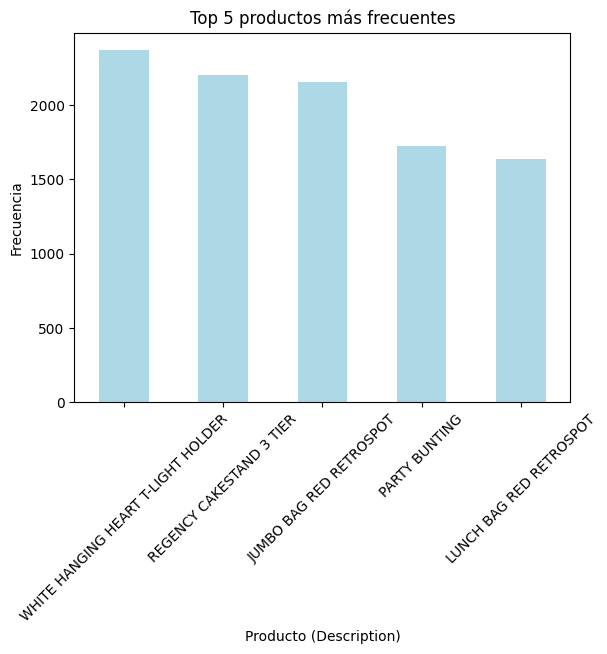

In [25]:
productos_freq = data["Description"].value_counts().head(5)
print(productos_freq)
productos_freq.plot(kind="bar", color="lightblue")
plt.title("Top 5 productos más frecuentes")
plt.xlabel("Producto (Description)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.

Se observó que un grupo reducido de productos concentra la mayor cantidad de transacciones realizadas. Esto indica que el negocio depende en gran medida de ciertos artículos “estrella”, que son los que impulsan la mayoría de las ventas. Este fenómeno puede ser una ventaja estratégica, ya que enfocarse en reforzar el inventario y lanzar campañas promocionales para estos productos podría aumentar aún más las ventas y mejorar la fidelización de los clientes.

Al analizar el valor total por factura, se identificó que la mayoría de las compras tienen un bajo monto, mientras que solo unas pocas facturas registran valores muy altos. Este comportamiento es típico de ventas minoristas, donde la frecuencia de compra es alta pero el importe individual es pequeño. Esta información es útil para entender mejor el perfil de los clientes y ajustar las estrategias de precios o promociones según el tipo de comprador predominante.

La evolución temporal de las ventas mostró fluctuaciones a lo largo del tiempo, con picos destacados en ciertas fechas específicas. Estos picos suelen coincidir con temporadas altas, promociones especiales o eventos particulares que incrementan la demanda. La tendencia general indica que las ventas no son constantes, sino que presentan un carácter estacional, por lo que la planificación de inventarios y campañas debe tener en cuenta estas variaciones para optimizar recursos.

En cuanto a la distribución de precios por país, se observó una gran dispersión en los precios unitarios mediante el uso de boxplots. Algunos mercados presentan valores atípicos muy altos, lo que podría deberse a la venta de productos exclusivos, diferencias en el tipo de cambio o costos adicionales como el envío. Esta información es fundamental para ajustar la política de precios según las características y condiciones de cada país.

No se encontró una relación clara entre la cantidad comprada y el precio unitario. Esto indica que no hay una correlación evidente que sugiera que los clientes reciban descuentos por comprar en volumen, o que las compras no dependen directamente del precio unitario. Esta conclusión puede ayudar a repensar la estrategia de descuentos y promociones por volumen, buscando incentivar la compra en cantidades mayores si fuera conveniente.

La distribución de clientes por país, mostrada en un gráfico de pastel, reveló que la mayoría de las ventas provienen de un pequeño grupo de países, mientras que otros contribuyen con porcentajes mínimos. Esta concentración geográfica del mercado muestra la importancia de fortalecer la presencia en los países donde ya se tiene buena participación, pero también señala la necesidad de diversificar y explorar oportunidades en regiones con baja participación para ampliar la base de clientes.

El análisis del precio unitario promedio mensual mostró variaciones moderadas en el tiempo, sin una tendencia clara de inflación constante. Estos cambios pueden estar relacionados con la disponibilidad de productos, fluctuaciones en costos logísticos o variaciones temporales en la demanda. Esta información es valiosa para monitorear los precios y mantener la competitividad en el mercado.

Los cinco productos más vendidos son artículos de alta rotación, generalmente vinculados a categorías como regalos o decoración. Identificar estos productos permite priorizar su control de inventario y diseñar estrategias de marketing específicas, asegurando que estos artículos estén siempre disponibles para satisfacer la demanda constante.

En términos generales, los datos reflejan una estructura de ventas estable pero concentrada, donde pocos productos y países dominan la mayor parte del volumen comercializado. A pesar de esta concentración, la dispersión en los precios y la variabilidad temporal en las ventas indican oportunidades para optimizar la gestión de precios y distribución, buscando diversificar riesgos y mejorar el rendimiento comercial.

Finalmente, el análisis pone en evidencia la importancia de una gestión de datos continua para comprender mejor el comportamiento de los clientes y las tendencias del mercado. Las visualizaciones utilizadas permiten identificar patrones clave y tomar decisiones informadas sobre inventario, precios y mercados prioritarios, lo cual es fundamental para mejorar la competitividad y el crecimiento del negocio.